In [1]:
import pandas as pd
import re #regular expression matching for removing unwanted columns by name
import natsort as ns #3rd party package for natural sorting


In [2]:
df0_raw = pd.read_csv("5G_count_all.tsv", sep = '\t')

# Removing columns

Need to remove the following columns manually 

[total, ribo0, br1_QC, br2_QC] - these dont exist in the dataframe 

[5GB1_ferm_WT_QC, 5GB1_ferm_Ack_QC, 5GB1C_latelog_vial_TR2_QC, 5GB1_FM58_Td20h_TR1_QC, 5GB1_FM58_Td32h_TR3_QC, 5GB1_LTrecycle_TR1_QC, 5GB1_LTrecycle_TR1,
5GB1_vial_wLa_TR3, 5GB1_vial_woLa_TR2]

Need to remove all QC runs except FM34 which we will keep

In [3]:
to_remove = ["5GB1_ferm_WT_QC", "5GB1_ferm_Ack_QC", "5GB1C_latelog_vial_TR2_QC", 
             "5GB1_FM58_Td20h_TR1_QC", "5GB1_FM58_Td32h_TR3_QC", "5GB1_LTrecycle_TR1_QC", "5GB1_LTrecycle_TR1",
             "5GB1_vial_wLa_TR3", "5GB1_vial_woLa_TR2"] 

In [4]:
#manually removing some unwanted columns 
df1_raw_filtered = df0_raw.drop(df0_raw.loc[:,to_remove].columns, axis = 1)
#Isolating FM34 - Cu transition 3+ hours 
df1a_FM34_only = df1_raw_filtered.select(lambda x: re.search("FM34", x), axis=1)
#Removing all QC runs 
df1_raw_filtered = df1_raw_filtered.select(lambda x: not re.search("QC", x), axis=1)


In [5]:
#naturally sorting the filtered columns
to_sort = df1_raw_filtered.loc[:,"5GB1_FM69_t2_TR1":]

cols = list(ns.natsorted(to_sort.columns))
cols_sorted = to_sort[cols]

#adding descriptive columns
qualitative = df1_raw_filtered.loc[:, "locus_tag":"translation"]
df1b_filtered_sorted = pd.concat([qualitative, cols_sorted], axis=1)

#isolating FM40 (to be added back later for particular order )
df1b_FM40_only = df1b_filtered_sorted.select(lambda x: re.search("FM40", x), axis=1)

#removing FM40 (to be added right back at the end)
df1b_filtered_sorted = df1b_filtered_sorted.select(lambda x: not re.search("FM40", x), axis=1)

#Adding FM40
cleaned_up = pd.concat([df1b_filtered_sorted, df1b_FM40_only], axis=1)

#adding FM34
df2_cleaned_up = pd.concat([cleaned_up, df1a_FM34_only], axis=1)

#setting locus tag as index
df2_cleaned_up = df2_cleaned_up.set_index("locus_tag")

In [6]:
df2_cleaned_up.head()

,product,type,gene_symbol,locus,start_coord,end_coord,note,translation,5GB1_FM12_TR1,5GB1_FM12_TR2,...,5GB1_FM40_T90m_TR2,5GB1_FM40_T150m_TR1_remake,5GB1_FM40_T180m_TR1,5GB1_FM34_T0_TR1_QC,5GB1_FM34_T3_TR3_QC,5GB1_FM34_T4_TR3_QC,5GB1_FM34_T5_TR2_QC,5GB1_FM34_T6_TR3_QC,5GB1_FM34_T7_TR3_QC,5GB1_FM34_T8_TR1_QC
locus_tag,,,,,,,,,,,,,,,,,,,,,
MBURv2_100001,conserved protein of unknown function,CDS,NaN,MBURv2,1965161,1965952,Evidence 4 : Homologs of previously reported g...,NaN,1913,1700,...,294,852,322,118,111,100,90,56,117,124
MBURv2_100002,conserved protein of unknown function,CDS,NaN,MBURv2,1966190,1966369,Evidence 4 : Homologs of previously reported g...,NaN,177,161,...,18,40,16,5,3,4,4,1,10,3
MBURv2_100003,protein of unknown function,CDS,NaN,MBURv2,1966931,1967041,Evidence 5 : No homology to any previously rep...,NaN,54,47,...,6,30,2,5,3,3,2,0,2,0
MBURv2_10001,protein of unknown function,CDS,NaN,MBURv2,116,289,Evidence 5 : No homology to any previously rep...,NaN,349,319,...,38,87,25,6,9,23,6,5,9,8
MBURv2_10002,KfrB,CDS,kfrB,MBURv2,497,844,NaN,NaN,1833,1199,...,667,1497,707,290,277,196,173,132,192,241


# Running TPM function on all the data columns


In [7]:
cd executible/

/Users/alexeygilman/repos/Cu_transition_time_course-/executible


In [8]:
%run Cu_transition_functionalized.py

In [9]:
columns = df2_cleaned_up.loc[:,"5GB1_FM12_TR1":].columns
df3_TPM = TPM_counts(df2_cleaned_up,"start_coord","end_coord",columns)

In [10]:
df3_TPM.describe()

,start_coord,end_coord,translation,5GB1_FM12_TR1,5GB1_FM12_TR2,5GB1_FM14_TR1,5GB1_FM14_TR2,5GB1_FM18_TR2,5GB1_FM18_TR3,5GB1_FM19_TR1,...,5GB1_FM40_T90m_TR2,5GB1_FM40_T150m_TR1_remake,5GB1_FM40_T180m_TR1,5GB1_FM34_T0_TR1_QC,5GB1_FM34_T3_TR3_QC,5GB1_FM34_T4_TR3_QC,5GB1_FM34_T5_TR2_QC,5GB1_FM34_T6_TR3_QC,5GB1_FM34_T7_TR3_QC,5GB1_FM34_T8_TR1_QC
count,4410.000000,4410.000000,0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,2523912.507710,2524848.262585,NaN,226.699899,226.695346,226.697112,226.704348,226.594462,226.614222,226.653431,...,226.688681,226.691177,226.693393,226.703354,226.700279,226.705513,226.700812,226.707496,226.690055,226.701056
std,1471366.679738,1471365.070314,NaN,2608.104118,2618.586261,2226.261750,2589.462563,1246.618739,1229.043510,1759.623610,...,1219.717871,1122.334667,1333.858585,1243.151858,1371.191334,1304.612055,1417.656243,1345.465894,1377.544663,1278.153592
min,116.000000,289.000000,NaN,0.128012,0.130699,0.303466,0.201181,0.235129,0.955192,0.425168,...,0.296514,0.495039,0.375090,0.455466,0.237590,0.114161,0.298391,0.263617,0.493421,0.252605
25%,1228352.750000,1230090.250000,NaN,23.920135,24.641320,25.954707,22.500866,43.295853,42.741254,26.266172,...,25.257989,26.315396,23.273639,25.932829,23.236787,24.509591,24.886934,24.752124,26.245040,25.814103
50%,2563815.000000,2564586.500000,NaN,51.965185,53.158422,57.974121,50.919943,83.877066,82.371945,57.175220,...,56.834464,58.201296,54.005551,57.905411,53.720495,55.809776,58.072669,59.395058,60.596720,61.800981
75%,3796009.000000,3796603.500000,NaN,109.742344,112.290835,123.777013,110.262018,162.001032,162.020610,120.513737,...,123.293527,129.071912,116.656100,124.025563,119.158968,125.158461,128.858717,130.436563,131.790463,134.177414
max,5066062.000000,5067294.000000,NaN,102291.663448,105614.890872,95689.662164,109973.088035,58854.542337,64511.010158,70926.914449,...,45789.636731,34735.533389,55623.888672,34926.035642,57022.329800,52977.343258,61079.897898,57365.249426,58854.913465,52180.163782


# Log 2 transform the data

In [11]:
df4_log2 = log_2_transform(df3_TPM,'5GB1_FM12_TR1','5GB1_FM34_T8_TR1_QC')

In [12]:
df4_log2.describe() 

,5GB1_FM12_TR1,5GB1_FM12_TR2,5GB1_FM14_TR1,5GB1_FM14_TR2,5GB1_FM18_TR2,5GB1_FM18_TR3,5GB1_FM19_TR1,5GB1_FM19_TR1_UW,5GB1_FM19_TR3,5GB1_FM20_TR3,...,5GB1_FM40_T90m_TR2,5GB1_FM40_T150m_TR1_remake,5GB1_FM40_T180m_TR1,5GB1_FM34_T0_TR1_QC,5GB1_FM34_T3_TR3_QC,5GB1_FM34_T4_TR3_QC,5GB1_FM34_T5_TR2_QC,5GB1_FM34_T6_TR3_QC,5GB1_FM34_T7_TR3_QC,5GB1_FM34_T8_TR1_QC
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,5.711915,5.741699,5.854974,5.685472,6.408118,6.397127,5.912669,5.895753,5.899650,6.172266,...,5.892627,5.939207,5.822109,5.891138,5.810324,5.867605,5.896775,5.893200,5.951252,5.960253
std,1.899290,1.892151,1.915438,1.948127,1.712715,1.718178,1.865792,1.855358,1.838577,1.877034,...,1.971689,1.973475,2.003664,1.960701,2.025366,2.019438,2.021813,2.034819,1.982845,1.999880
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.580154,4.623007,4.697924,4.491909,5.436157,5.417557,4.715134,4.732986,4.729698,4.988780,...,4.658668,4.717835,4.540624,4.696708,4.538339,4.615274,4.637316,4.629480,4.713973,4.690087
50%,5.699473,5.732226,5.857337,5.670159,6.390204,6.364081,5.837318,5.837747,5.842178,6.140328,...,5.828694,5.862979,5.755035,5.855626,5.747401,5.802446,5.859787,5.892270,5.921168,5.949558
75%,6.777976,6.811096,6.951600,6.784790,7.339859,7.340033,6.913054,6.893761,6.888171,7.209547,...,6.945953,7.012031,6.866118,6.954494,6.896744,6.967612,7.009646,7.027205,7.042102,7.067998
max,16.642329,16.688454,16.546075,16.746791,15.844866,15.977258,16.114046,16.573410,16.635053,15.420885,...,15.482733,15.084125,15.763417,15.092015,15.799239,15.693088,15.898410,15.807889,15.844875,15.671214


# Taking log2 ratio (fm23 is the baseline)

In [13]:
df5_log2_ratio = df4_log2.subtract(df4_log2['5GB1_FM23_TR3'], axis = "index")

In [14]:
df5_log2_ratio = df5_log2_ratio.drop(['5GB1_FM23_TR3'], axis = 1)

In [15]:
df5_log2_ratio.columns

Index(['5GB1_FM12_TR1', '5GB1_FM12_TR2', '5GB1_FM14_TR1', '5GB1_FM14_TR2',
       '5GB1_FM18_TR2', '5GB1_FM18_TR3', '5GB1_FM19_TR1', '5GB1_FM19_TR1_UW',
       '5GB1_FM19_TR3', '5GB1_FM20_TR3', '5GB1_FM20_TR3_UW', '5GB1_FM21_TR1',
       '5GB1_FM21_TR2', '5GB1_FM21_TR2_UW', '5GB1_FM22_TR1', '5GB1_FM22_TR3',
       '5GB1_FM22_TR3_UW', '5GB1_FM69_t2_TR1', '5GB1_FM69_t3_TR1',
       '5GB1_FM69_t3_TR1_UW', '5GB1_FM69_t4_TR1', '5GB1_FM69_t4_TR1_UW',
       '5GB1_FM80_t2_TR1', '5GB1_FM80_t4_TR1', '5GB1_FM81_t1_TR3',
       '5GB1_FM81_t2_TR3', '5GB1_FM40_T0m_TR2', '5GB1_FM40_T10m_TR3',
       '5GB1_FM40_T20m_TR2', '5GB1_FM40_T40m_TR1', '5GB1_FM40_T60m_TR1',
       '5GB1_FM40_T90m_TR2', '5GB1_FM40_T150m_TR1_remake',
       '5GB1_FM40_T180m_TR1', '5GB1_FM34_T0_TR1_QC', '5GB1_FM34_T3_TR3_QC',
       '5GB1_FM34_T4_TR3_QC', '5GB1_FM34_T5_TR2_QC', '5GB1_FM34_T6_TR3_QC',
       '5GB1_FM34_T7_TR3_QC', '5GB1_FM34_T8_TR1_QC'],
      dtype='object')

# Clustering log2(ratio)

In [16]:
from sklearn.cluster import KMeans

X = df5_log2_ratio

kmeans = KMeans(n_clusters=60)
kmeans.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=60, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [17]:
labels_kmeans = kmeans.labels_
print(np.unique(labels_kmeans)) # unique bins
print(np.bincount(labels_kmeans[labels_kmeans!=-1])) #genes in each bin/cluster

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59]
[ 64 237 115  78   5  91 256 170  11  13   5  49  11  25 213  55  36   1
 155 161 126 103 148 193  11   9 113 241   2   4   8  45  92  11 143  22
  70 203   1  15  22  19  16 103  61   1   9   3  83   4  14  70  32 230
  16   5   6  95 130 180]


In [18]:
#Adding cluster labels to gene dataframe
clusters_df = pd.DataFrame(labels_kmeans, index = df5_log2_ratio.index)
clusters_df.rename(columns = {0:"cluster"}, inplace = True)
df6_clusters = pd.concat([df5_log2_ratio, clusters_df], axis = 1)



# Plotting the resulting clusters

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

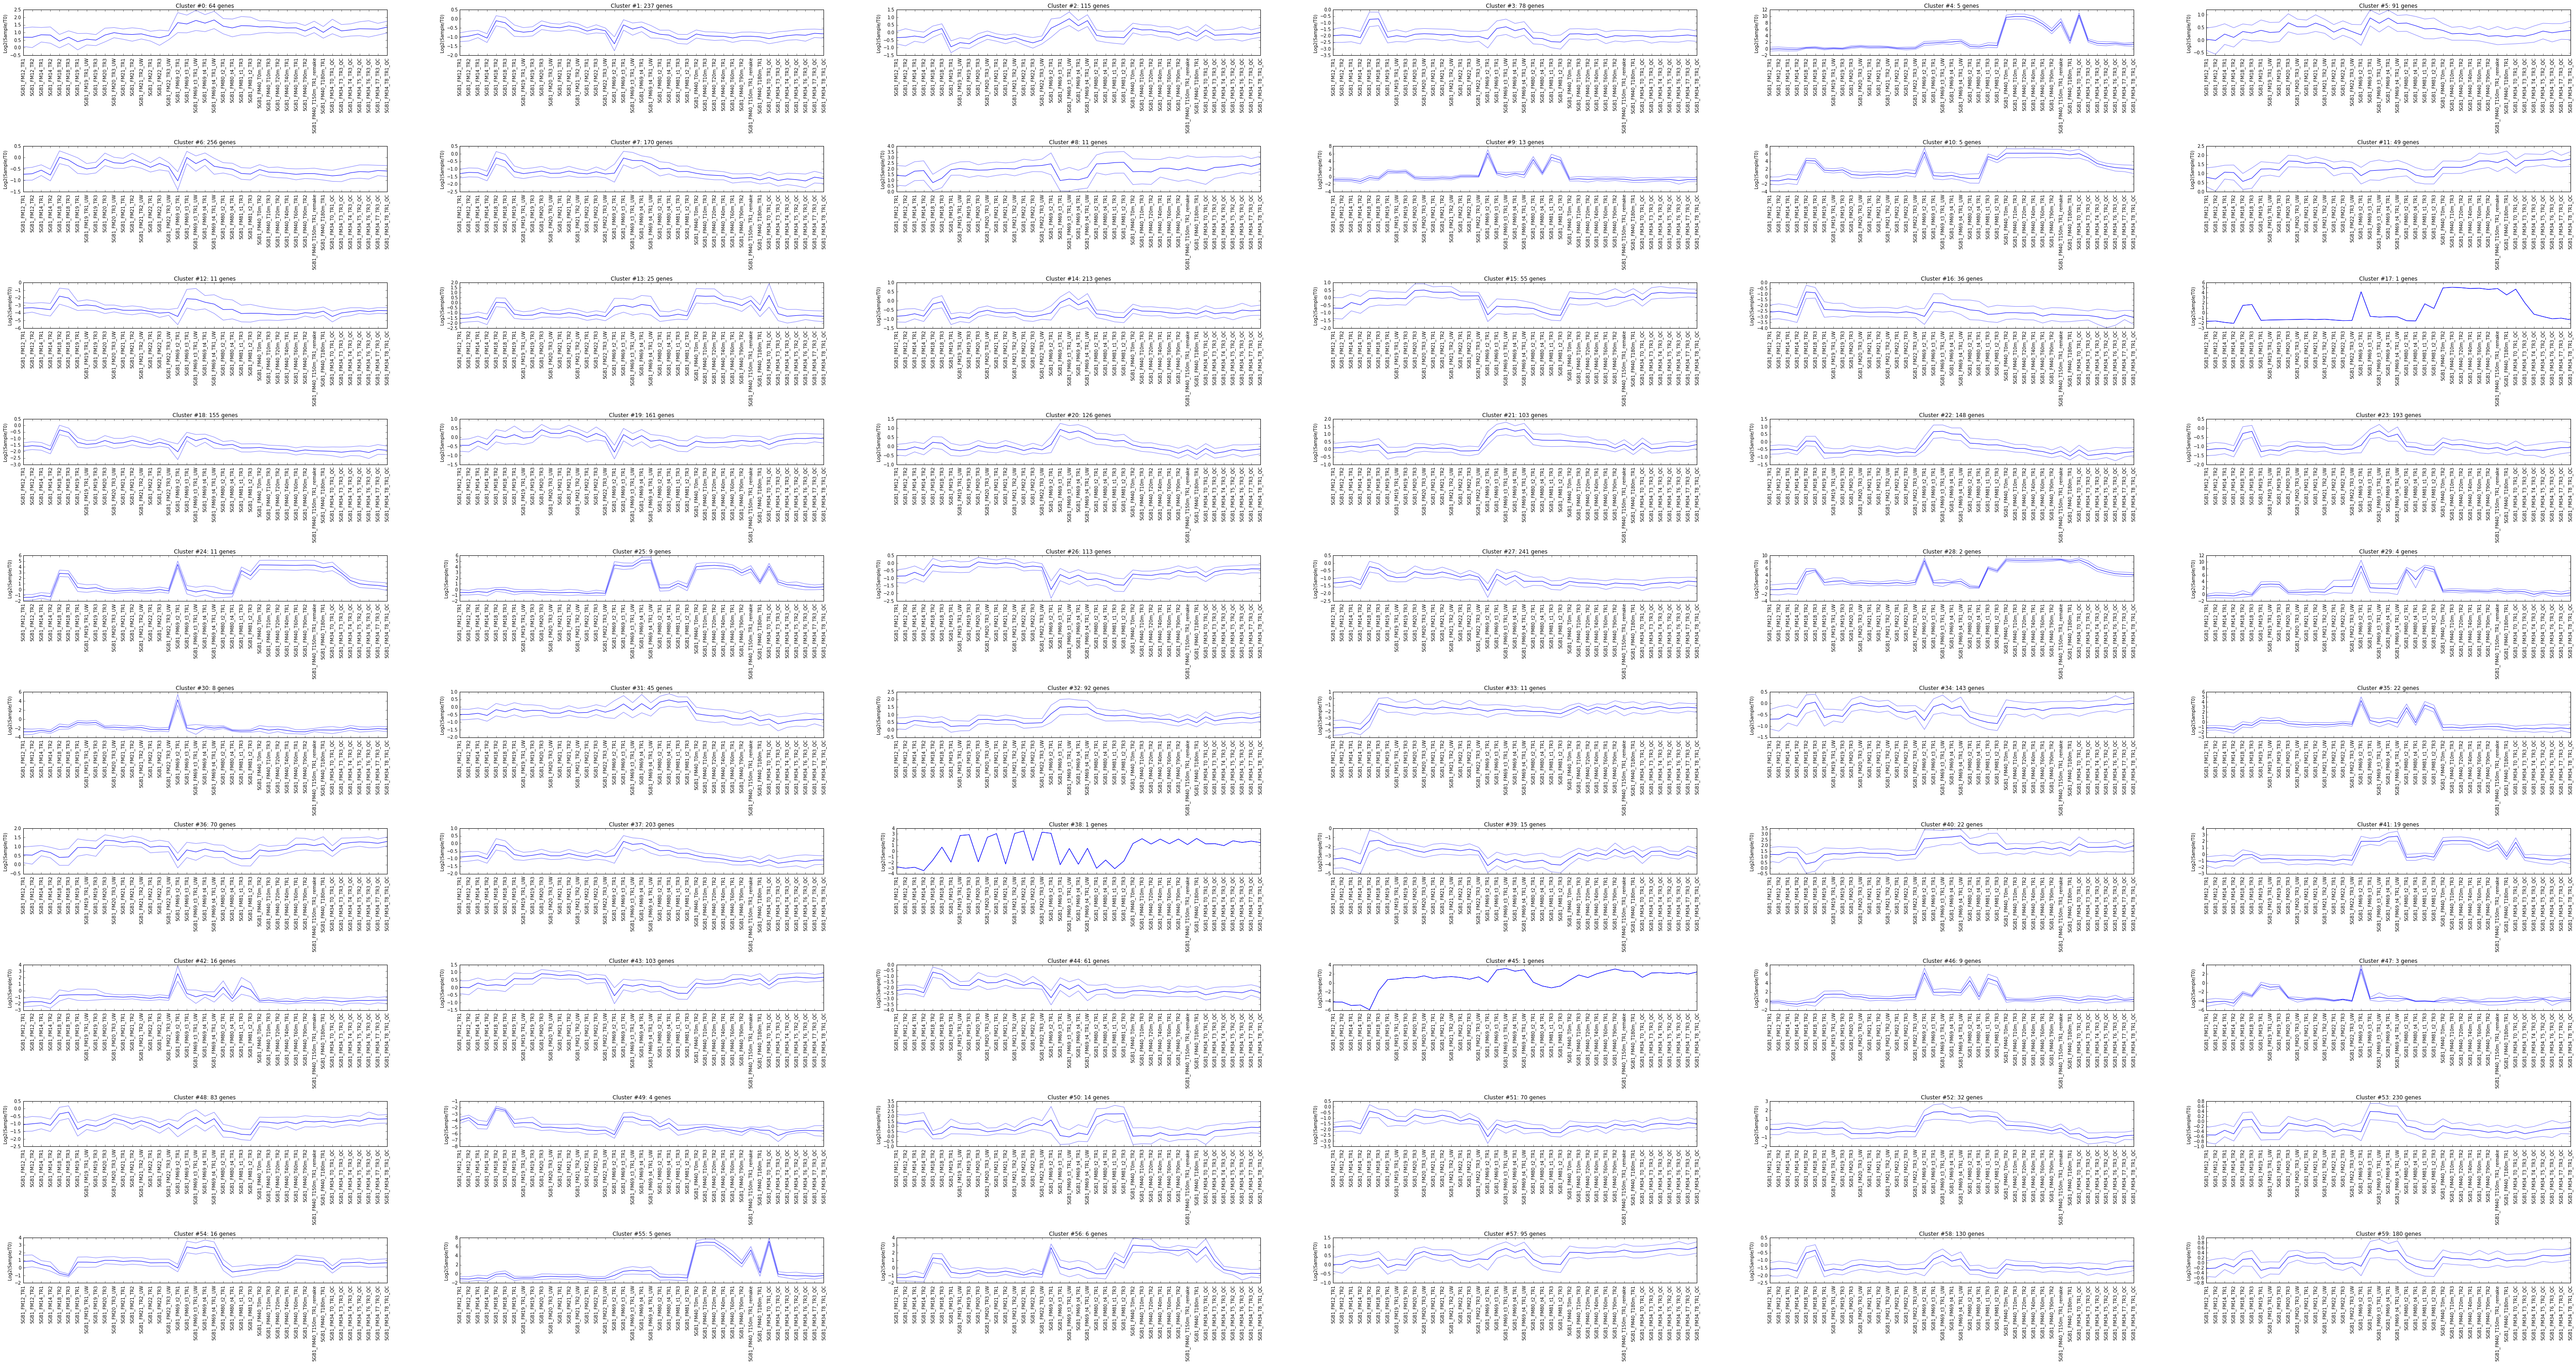

In [20]:
def draw_clust_means(df, n_rows, n_cols):
    """
    Draw scatter plot of mean gene expression level for genes in that cluster.
    Will include 1 standard deviation error margin within the plot. 
    Plot will be saves as pdf file. 
    
    
    df: daframe with locus tag as index, and "cluster" column with cluster number for each gene. 
    n_rows: int value for the subplot grid
    n_cols: int value for subplot grid
    
    """
    
    
    fig = plt.figure(figsize = (100, 50))
    x_axis = list(range(len(df.columns)-1))
    x_ticks = df.loc[:, df.columns != "cluster"]
    
    y_stdev = df.groupby("cluster").std()
    y_mean = df.groupby("cluster").mean()
    
    y_low = y_mean.subtract(y_stdev, fill_value=0)
    y_high = y_mean.add(y_stdev, fill_value = 0)
    
    count = df.groupby("cluster").count().iloc[:,0]
    
    for i in range(y_mean.shape[0]):
        y = y_mean.values[i]
        y_hi = y_high.values[i]
        y_lo = y_low.values[i]
        
        title_str = "Cluster #"+ str(i) + ": " + str(count[i]) + " genes"
        
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        ax.set_xticks(x_axis)
        ax.set_xticklabels(x_ticks, rotation = "vertical")
        ax.set_title(title_str)
        ax.set_ylabel("Log2(Sample/T0)")
        
        ax.plot(x_axis, y, "b-")
        ax.plot(x_axis, y_hi, "b-", alpha = 0.5)
        ax.plot(x_axis, y_lo, "b-", alpha = 0.5 )
        
    fig.subplots_adjust(hspace = 2)
    plt.show()
    fig.savefig("cluster_means.pdf")
    
    
testa = df6_clusters #.iloc[:500,:]
draw_clust_means(testa, 10, 6 )

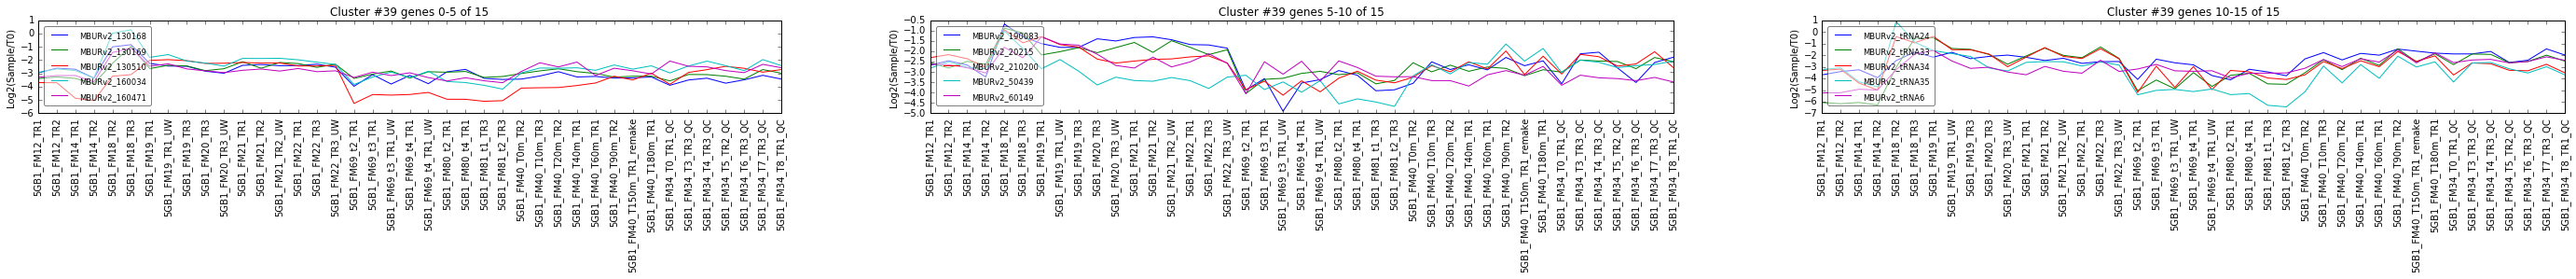

In [93]:
def draw_clst_genes(df, clst):
    
    """
    Plots the expression profile of each gene in a specified cluster. Creates subplots with 5 genes per subplot. 
    
    
    df: dataframe with normalized read counts for each sample and a "cluster" column with cluster id #
    clst: int value of the cluster number the genes of which need to be plotting across samples. 
    """
    

    fig = plt.figure(figsize = (100, 50))
    x_axis = list(range(len(df.columns)-1))
    x_ticks = df.loc[:, df.columns != "cluster"]
    
    clst_index = df.loc[df["cluster"] == clst,:].index
    
    n_cols = 6
    n_rows = 10
    
    count_subplots = 1
    for i, val in enumerate(clst_index):
        
        if i % 5 == 0:
            ax = fig.add_subplot(n_rows, n_cols, count_subplots)
            count_subplots += 1
            title_str = "Cluster #"+ str(clst) + " genes " + str(i) + "-" + str(i + 5) +" of " + str(len(clst_index))
             
        y = df.loc[val, (df.columns != "cluster")].values
        ax.set_xticks(x_axis)
        ax.set_xticklabels(x_ticks, rotation = "vertical")
        ax.set_title(title_str)
        ax.set_ylabel("Log2(Sample/T0)")
        
        ax.plot(x_axis,y, label = str(val))
        leg = ax.legend(fancybox = True ,loc='upper left')
        leg.get_frame().set_alpha(0.5) #translucent 
        
        for label in leg.get_texts():
            label.set_fontsize('small')
        
    fig.subplots_adjust(hspace = 2)
    plt.show()
    fig.savefig("cluster " + str(clst) + " genes.pdf")
    return list(clst_index) #returns a list 
    
testa = df6_clusters #.iloc[:500,:]
the_list = draw_clst_genes(testa, 39)

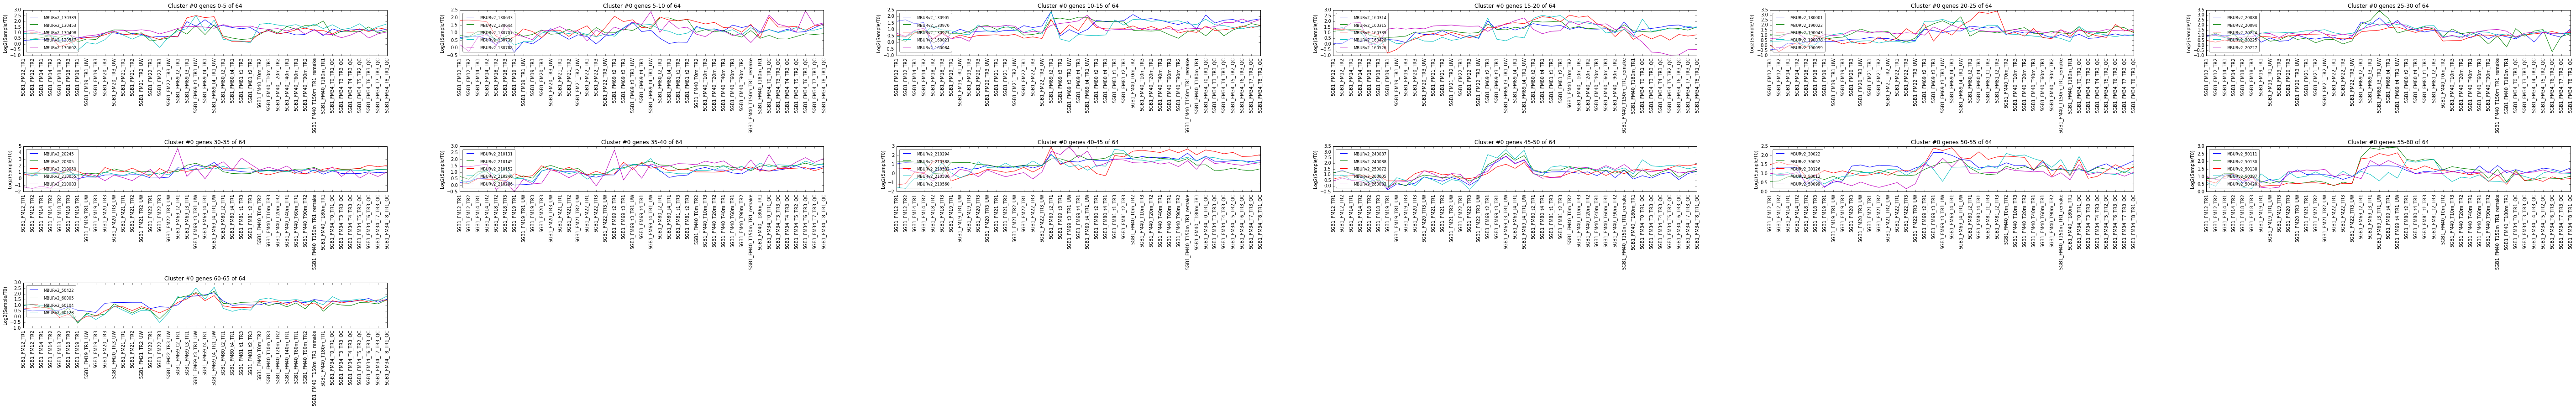

In [76]:
the_list = draw_clst_genes(testa, 0)

In [91]:
def draw_gene_list(df, gene_list):
    
    fig = plt.figure(figsize = (20, 10))
    ax = fig.add_subplot(111)
    
    x_axis = list(range(len(df.columns)-1))
    x_ticks = df.loc[:, df.columns != "cluster"]
    
    title_str = "Select gene expression across samples"
    
    for i in gene_list:
        y = df.loc[i, (df.columns != "cluster")].values
        ax.plot(x_axis, y, label = str(i))
        
        leg = ax.legend(fancybox = True ,loc='upper left')
        
        ax.set_xticks(x_axis)
        ax.set_xticklabels(x_ticks, rotation = "vertical")
        #ax.set_title(title_str, fontsize = 50)
        ax.set_ylabel("Log2(Sample/T0)", fontsize = 15)
        
    fig.suptitle(title_str, fontsize = 20)
    plt.show()
    fig.savefig("list_of_genes.pdf")    

In [94]:
the_list

['MBURv2_130168',
 'MBURv2_130169',
 'MBURv2_130510',
 'MBURv2_160034',
 'MBURv2_160471',
 'MBURv2_190083',
 'MBURv2_20215',
 'MBURv2_210200',
 'MBURv2_50439',
 'MBURv2_60149',
 'MBURv2_tRNA24',
 'MBURv2_tRNA33',
 'MBURv2_tRNA34',
 'MBURv2_tRNA35',
 'MBURv2_tRNA6']

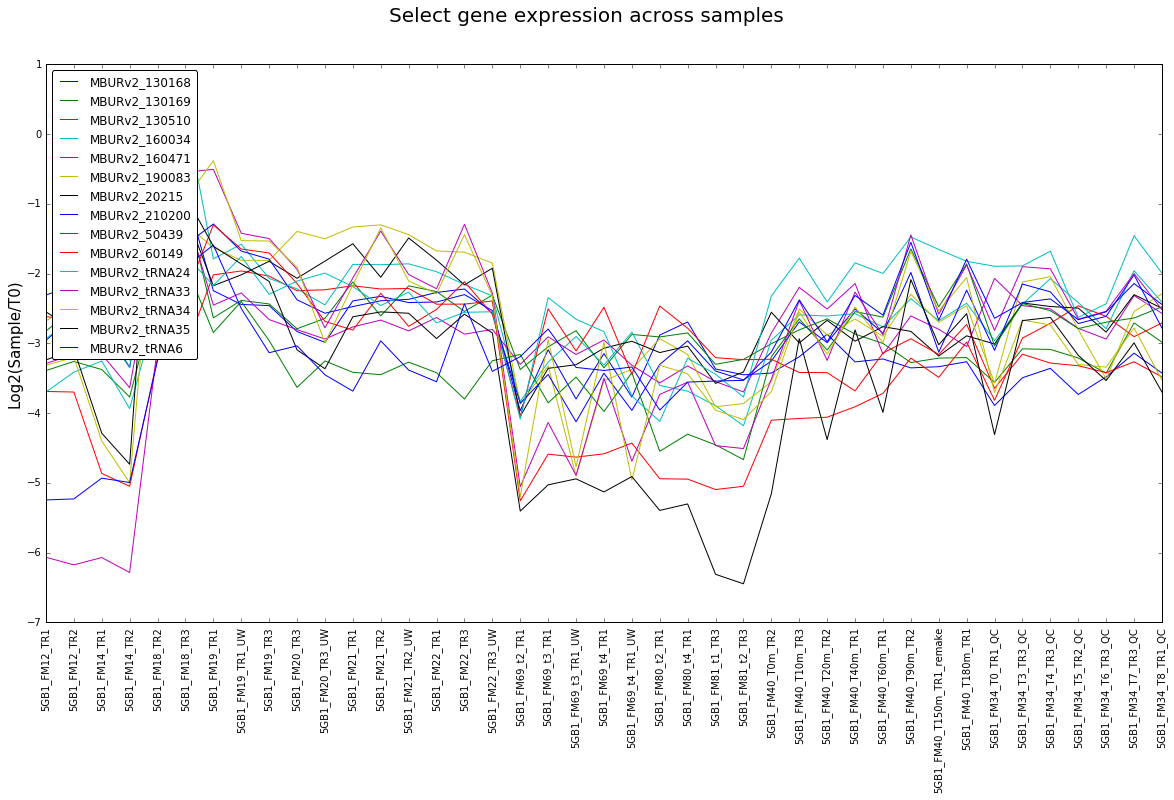

In [95]:
#the_list = ['MBURv2_10079']
draw_gene_list(testa, the_list)
#the_list

# Learning categorical plotting

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
df5_log2_ratio


,5GB1_FM12_TR1,5GB1_FM12_TR2,5GB1_FM14_TR1,5GB1_FM14_TR2,5GB1_FM18_TR2,5GB1_FM18_TR3,5GB1_FM19_TR1,5GB1_FM19_TR1_UW,5GB1_FM19_TR3,5GB1_FM20_TR3,...,5GB1_FM40_T90m_TR2,5GB1_FM40_T150m_TR1_remake,5GB1_FM40_T180m_TR1,5GB1_FM34_T0_TR1_QC,5GB1_FM34_T3_TR3_QC,5GB1_FM34_T4_TR3_QC,5GB1_FM34_T5_TR2_QC,5GB1_FM34_T6_TR3_QC,5GB1_FM34_T7_TR3_QC,5GB1_FM34_T8_TR1_QC
locus_tag,,,,,,,,,,,,,,,,,,,,,
MBURv2_100001,-0.662138,-0.664962,-0.340741,-0.336630,0.192390,0.399056,-0.390956,-0.599171,-0.591524,0.226044,...,-0.462619,-0.225706,-0.392373,-0.353053,-0.397100,-0.625675,-0.353980,-0.217239,-0.145831,-0.169520
MBURv2_100002,-1.274654,-1.243865,-1.715639,-2.215571,-0.405649,-0.309960,-0.493421,-0.865135,-0.662042,-0.581343,...,-1.670867,-1.816988,-1.901790,-2.092269,-2.785054,-2.448032,-2.024334,-3.203095,-0.872769,-2.717254
MBURv2_10001,-1.812235,-1.774428,-1.724550,-1.778433,-0.349818,-0.432159,-1.751745,-2.126936,-2.111356,-0.748817,...,-2.109923,-2.213031,-2.774993,-3.346293,-2.717150,-1.441528,-2.956430,-2.398225,-2.541830,-2.819275
MBURv2_10002,-1.325059,-1.769956,-0.577714,-0.566898,-0.429268,0.644220,-0.101514,-0.505719,-0.604120,0.573052,...,0.117961,-0.013848,0.140986,0.342922,0.320936,-0.256112,-0.012496,0.418509,-0.032524,0.187883
MBURv2_10003,-1.106884,-1.116421,-0.932348,-0.947665,-0.475120,-0.160000,-1.024359,-0.767429,-0.868287,-0.398919,...,-0.917400,-0.769655,-0.995845,-0.757963,-0.827739,-0.908580,-1.117293,-0.544255,-0.977173,-0.737528
MBURv2_10004,-1.447906,-1.433121,-1.518388,-1.776360,-0.899257,-0.825776,-0.869059,-0.924090,-0.658136,-0.253637,...,-1.627717,-1.695973,-1.938693,-1.812556,-2.007563,-1.508521,-1.363799,-1.913398,-1.675518,-1.661047
MBURv2_10005,-0.343968,-0.324091,-0.499226,-0.638876,0.097045,0.142822,0.039685,0.393183,0.426912,0.688214,...,-0.157898,-0.194928,-0.119981,-0.941338,-0.940879,-0.953799,-0.388746,-0.586872,-0.743533,-0.705622
MBURv2_10006,-0.071511,-0.578558,-0.360399,0.247718,0.183645,0.749078,-0.609334,-0.022279,-0.477635,0.118908,...,0.070431,-0.057768,0.148836,0.710430,-0.458794,-0.153480,-0.388746,0.091457,0.514892,-0.107201
MBURv2_10007,0.231198,-0.128503,-0.023581,0.694878,0.715366,0.443388,0.194635,0.273867,0.336801,1.144038,...,0.017189,-0.188766,0.126116,-0.234288,-1.038104,-0.759976,-1.336278,-0.930076,-0.297187,-1.154729


In [30]:
x_axis = list(range(41))
df5_log2_ratio.loc["MBURv2_200002",:].values #print(len(x_axis))

array([-2.64366286, -2.82575567, -2.48284325, -2.64694531,  4.94004897,
        5.02482941,  1.25073173,  1.10559063,  1.2570876 , -0.95472228,
       -1.13721623, -0.76826503, -0.67201404, -0.80064231, -0.57604197,
       -0.25492805, -0.46434391,  8.02428896, -1.21414616, -1.48665936,
       -1.20603935, -1.43414969, -2.29288228, -2.56195627,  6.22922598,
        5.31179921,  7.84139547,  7.64458952,  7.83687815,  7.67870583,
        7.46541204,  7.28480844,  7.26711914,  6.90426907,  7.70924004,
        5.96920514,  3.8492341 ,  2.4032448 ,  1.63229539,  1.18578255,
        0.78512604])

In [31]:
plt.plot?

In [32]:
x_axis = list(range(41))
y = df7_clust_means.values[22]
y_up = test_high_std.values[22]
y_low = test_low_std.values[22]
#a.plot(x1, y1, 'g^', x2, y2, 'g-')
x_ticks = df7_clust_means.columns

fig = plt.figure(figsize=(20,10))

plt.plot(x_axis, y, "g-", x_axis, y_up, "r--", x_axis, y_low, "r--" )
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x_axis, x_ticks, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.1)
plt.show()


NameError: name 'df7_clust_means' is not defined

In [ ]:
x_axis = list(range(41))
y = df7_clust_means.values[11]

x_ticks = df7_clust_means.columns

fig = plt.figure(figsize=(20,10))

plt.plot(x_axis, y)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x_axis, x_ticks, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.1)
plt.show()

### What is in cluster 11? 

In [ ]:
df6_clusters.loc[df6_clusters.cluster == 11]

In [ ]:
cluster11=df6_clusters.loc[df6_clusters.cluster == 11]
df3_TPM.loc[cluster11.index,:]

In [ ]:
x_axis = list(range(len(df7a_10_rows.columns)))
x_ticks = df7a_10_rows.columns

fig = plt.figure(figsize = (100, 50))
    
y = df7a_10_rows.values[0]
#ax = fig.add_subplot(2, 2, 1)
plt.plot(x_axis,y)
plt.show()

In [ ]:
def draw_scatter(df, n_rows, n_cols):
    
    fig = plt.figure(figsize = (100, 50))
    x_axis = list(range(len(df.columns)))
    x_ticks = df.columns
    
    for i in range(df.shape[0]):
        y = df.values[i]
        title_str = "Cluster #"+ str(i)
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        ax.set_xticks(x_axis)
        ax.set_xticklabels(x_ticks, rotation = "vertical")
        ax.set_title(title_str)
        ax.plot(x_axis,y)
        
        
    fig.subplots_adjust(hspace = 2)
    plt.show()
    fig.savefig("clusters_scatter.pdf")
    
    
testa = df7a_10_rows
draw_scatter(testa, 10, 6 )

In [ ]:
def draw_scatter(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize = (20,10))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(ax=ax, histtype = "stepfilled", alpha = 0.3, normed = True, bins = 1000) 
        ax.set_title(var_name)
    plt.show()

testa = df2_TPM_log2_diff
draw_histograms(testa, testa.columns, 2, 4)

In [ ]:
def draw_scatter(df, clst, n_rows, n_cols):

    fig = plt.figure(figsize = (100, 50))
    x_axis = list(range(len(df.columns)-1))
    x_ticks = df.loc[:, df.columns != "cluster"]
    
    clst_index = df.loc[df["cluster"] == clst,:].index
    
    for i in clst_index:
        y = df6_clusters.loc[i, (df6_clusters.columns != "cluster")].values
        plt.plot(x_axis,y)
    
    plt.show()
    fig.savefig("cluster " + str(clst) + " genes.pdf")
    
testa = df6_clusters #.iloc[:500,:]
draw_scatter(testa, 1, 6, 4)

# Plotting a single gene 

In [ ]:
#plotting a single gene

x_axis = list(range(41))
y = df5_log2_ratio.loc["MBURv2_200002",:].values

x_ticks = df7_clust_means.columns

fig = plt.figure(figsize=(20,10))

plt.plot(x_axis, y)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x_axis, x_ticks, rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.1)
plt.show()



# Going to try to cluster with HDBSCAN just for giggles

In [ ]:
"""
import hdbscan
X = df5_log2_ratio
HDBSCAN = hdbscan.HDBSCAN(metric = "euclidean", min_cluster_size=5)
HDBSCAN.fit(X)
labels = HDBSCAN.labels_



print(np.unique(labels)) # unique bins, zero is noise
print(np.bincount(labels[labels!=-1])) 
"""

In [ ]:
plt.plot?